In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [2]:
from tensorflow.keras.utils import image_dataset_from_directory

train_path = r"\Plant_leaf_disease\dataset_split\train"

training_set = image_dataset_from_directory(
    train_path,
    labels="inferred", #same class as in folders
    label_mode="categorical", #more than 2 class
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 43428 files belonging to 38 classes.


In [3]:
val_path = r"\Plant_leaf_disease\dataset_split\val"
val_set = image_dataset_from_directory(
    val_path,
    labels="inferred", #same class as in folders
    label_mode="categorical", #more than 2 class
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 10876 files belonging to 38 classes.


In [4]:
base_model = MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # Freeze base model

In [5]:
model = Sequential()

model.add(base_model)

# Global average pooling
model.add(GlobalAveragePooling2D())

# Dropout for regularization
model.add(Dropout(0.5))

# Dense layer
model.add(Dense(128, activation='relu'))

#output layer
model.add(Dense(38, activation='softmax'))  # 38 classes 


In [6]:
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 38)                4902      
                                                                 
Total params: 2,426,854
Trainable params: 168,870
Non-tr

In [8]:
history = model.fit(x=training_set,validation_data=val_set,epochs=10)

Epoch 1/10
1358/1358 [==============================] - 48s 32ms/step - loss: 1.9162 - accuracy: 0.4689 - val_loss: 1.2747 - val_accuracy: 0.6380
Epoch 2/10
1358/1358 [==============================] - 48s 35ms/step - loss: 1.4663 - accuracy: 0.5729 - val_loss: 1.1828 - val_accuracy: 0.6531
Epoch 3/10
1358/1358 [==============================] - 39s 28ms/step - loss: 1.3582 - accuracy: 0.6022 - val_loss: 1.0937 - val_accuracy: 0.6773
Epoch 4/10
1358/1358 [==============================] - 34s 25ms/step - loss: 1.2811 - accuracy: 0.6208 - val_loss: 1.0203 - val_accuracy: 0.6912
Epoch 5/10
1358/1358 [==============================] - 33s 25ms/step - loss: 1.2345 - accuracy: 0.6314 - val_loss: 0.9810 - val_accuracy: 0.7032
Epoch 6/10
1358/1358 [==============================] - 33s 24ms/step - loss: 1.2011 - accuracy: 0.6422 - val_loss: 0.9488 - val_accuracy: 0.7120
Epoch 7/10
1358/1358 [==============================] - 33s 24ms/step - loss: 1.1725 - accuracy: 0.6482 - val_loss: 0.9305 -

In [9]:
# Unfreeze the base model
base_model.trainable = True

# Freeze first N layers to avoid messing up low-level filters
for layer in base_model.layers[:100]:
    layer.trainable = False


In [10]:
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # lower learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 38)                4902      
                                                                 
Total params: 2,426,854
Trainable params: 2,030,310
Non-

In [12]:
history = model.fit(x=training_set,validation_data=val_set,epochs=10)

Epoch 1/10
1358/1358 [==============================] - 54s 38ms/step - loss: 5.3602 - accuracy: 0.3070 - val_loss: 2.3812 - val_accuracy: 0.4801
Epoch 2/10
1358/1358 [==============================] - 47s 34ms/step - loss: 1.9694 - accuracy: 0.4839 - val_loss: 1.3312 - val_accuracy: 0.6227
Epoch 3/10
1358/1358 [==============================] - 44s 32ms/step - loss: 1.5088 - accuracy: 0.5741 - val_loss: 1.0831 - val_accuracy: 0.6803
Epoch 4/10
1358/1358 [==============================] - 44s 32ms/step - loss: 1.2464 - accuracy: 0.6377 - val_loss: 0.9384 - val_accuracy: 0.7214
Epoch 5/10
1358/1358 [==============================] - 44s 32ms/step - loss: 1.0703 - accuracy: 0.6792 - val_loss: 0.8153 - val_accuracy: 0.7506
Epoch 6/10
1358/1358 [==============================] - 44s 32ms/step - loss: 0.9396 - accuracy: 0.7168 - val_loss: 0.7515 - val_accuracy: 0.7710
Epoch 7/10
1358/1358 [==============================] - 44s 32ms/step - loss: 0.8312 - accuracy: 0.7447 - val_loss: 0.6832 -

In [13]:
#model evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

1358/1358 [==============================] - 27s 20ms/step - loss: 0.3558 - accuracy: 0.8883


In [14]:
#model evaluation on val
val_loss,val_acc = model.evaluate(val_set)

340/340 [==============================] - 7s 20ms/step - loss: 0.5581 - accuracy: 0.8265


In [15]:
from tensorflow.keras.applications import ResNet50

In [17]:
from tensorflow.keras.utils import image_dataset_from_directory

train_path = r"\Plant_leaf_disease\dataset_split\train"

training_set2 = image_dataset_from_directory(
    train_path,
    labels="inferred", #same class as in folders
    label_mode="categorical", #more than 2 class
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 43428 files belonging to 38 classes.


In [18]:
val_path = r"\Plant_leaf_disease\dataset_split\val"
val_set2 = image_dataset_from_directory(
    val_path,
    labels="inferred", #same class as in folders
    label_mode="categorical", #more than 2 class
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 10876 files belonging to 38 classes.


In [19]:
base_model = ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # Freeze all layers for transfer learning

In [21]:
model = Sequential()

# Base model
model.add(base_model)

# Global pooling
model.add(GlobalAveragePooling2D())

# lDropout layer
model.add(Dropout(0.5))

# Dense hidden layer
model.add(Dense(128, activation='relu'))

# Final output layer 
model.add(Dense(38, activation='softmax'))

In [23]:
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               262272    
                                                                 
 dense_5 (Dense)             (None, 38)                4902      
                                                                 
Total params: 23,854,886
Trainable params: 267,174
Non-trainable params: 23,587,712
____________________________________

In [25]:
history_resnet = model.fit(
    x=training_set2,
    validation_data=val_set2,
    epochs=10
)

Epoch 1/10
1358/1358 [==============================] - 187s 136ms/step - loss: 0.4941 - accuracy: 0.8532 - val_loss: 0.1579 - val_accuracy: 0.9469
Epoch 2/10
1358/1358 [==============================] - 192s 141ms/step - loss: 0.2320 - accuracy: 0.9238 - val_loss: 0.1496 - val_accuracy: 0.9490
Epoch 3/10
1358/1358 [==============================] - 207s 152ms/step - loss: 0.1943 - accuracy: 0.9347 - val_loss: 0.1168 - val_accuracy: 0.9614
Epoch 4/10
1358/1358 [==============================] - 181s 133ms/step - loss: 0.1732 - accuracy: 0.9411 - val_loss: 0.0984 - val_accuracy: 0.9659
Epoch 5/10
1358/1358 [==============================] - 185s 136ms/step - loss: 0.1647 - accuracy: 0.9438 - val_loss: 0.0983 - val_accuracy: 0.9676
Epoch 6/10
1358/1358 [==============================] - 201s 148ms/step - loss: 0.1589 - accuracy: 0.9452 - val_loss: 0.0972 - val_accuracy: 0.9659
Epoch 7/10
1358/1358 [==============================] - 181s 133ms/step - loss: 0.1474 - accuracy: 0.9487 - val_

In [27]:
train_loss,train_acc = model.evaluate(training_set2)

1358/1358 [==============================] - 155s 114ms/step - loss: 0.0451 - accuracy: 0.9847


In [28]:
val_loss,val_acc = model.evaluate(val_set2)

340/340 [==============================] - 45s 132ms/step - loss: 0.0907 - accuracy: 0.9697


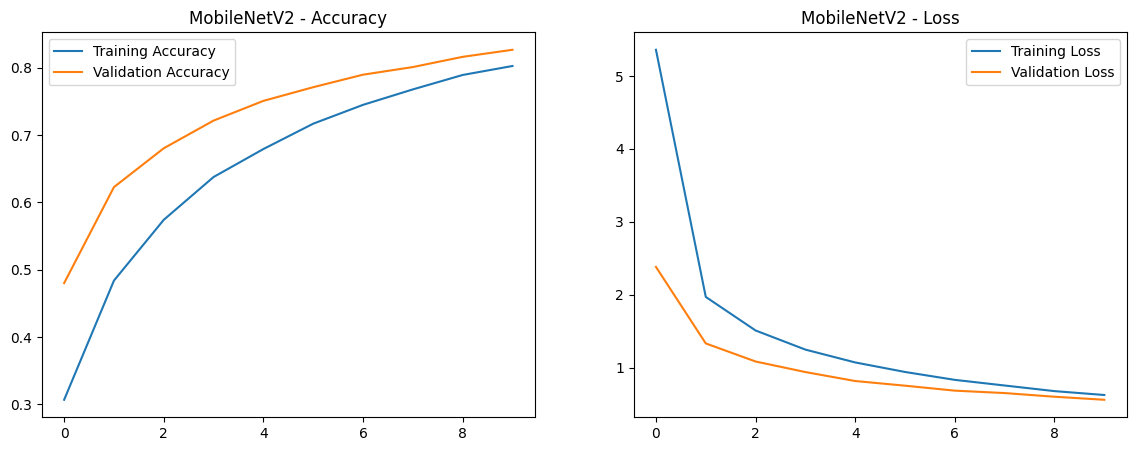

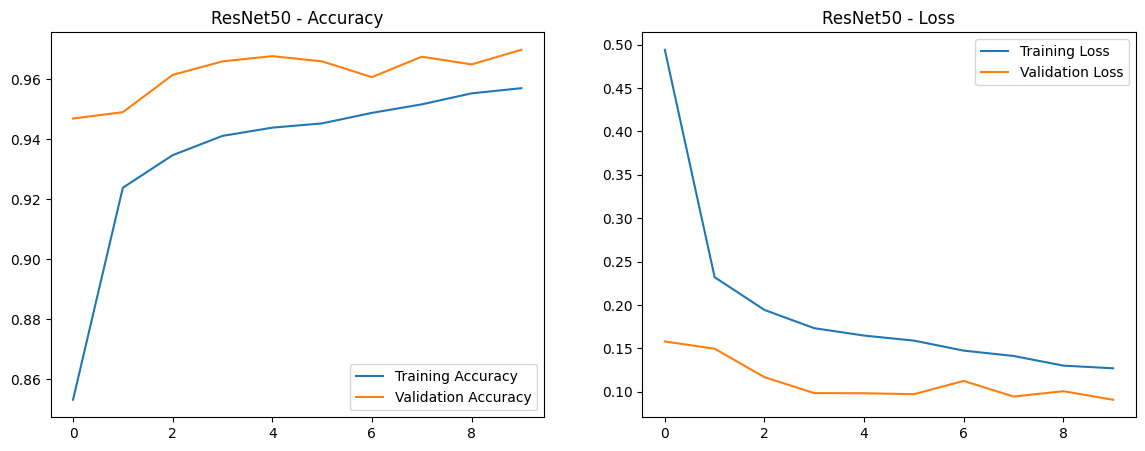

In [ ]:
import matplotlib.pyplot as plt

def plot_training(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.legend()

    plt.show()

plot_training(history, "MobileNetV2")
plot_training(history_resnet, "ResNet50")

In [42]:
model.save("trained_resnet.keras")